In [7]:
import sys
import os
import numpy as np
# Add the root directory of the package to sys.path
sys.path.append('/Users/user/PythonProjects/')

from spdust_python.spdust.charge_dist import charge_dist
from spdust_python.spdust.emissivity import *

In [8]:
# See DL98b table I for the parameters

# nh: number density of hydrogen atoms in cm^-3
# T: temperature in K
# Chi: intensity of the radiation field relative to the average interstelar radiation field
# xh: hydrogen ionization fraction
# xC: ionized carbon fractional abundance
# y: molecular hydrogen fractional abundance
# gamma: H2 formation efficiency
# dipole: rms dipole moment for dust grains in Debye 
# line: parameters for the grain size distribution : provide the corresponding line of table 1 of Weingartner
# & Draine (2001b) (starting at one) under the tag line

DC_params = {'nh' : 1e4, 'T': 10., 'Chi': 1e-4, 'xh': 0., 'xC': 1e-6, 'y' : 0.999,  'gamma': 0, 'dipole': 9.3, 'line':7}

MC_params = {'nh' : 3e2, 'T': 20., 'Chi': 1e-2, 'xh': 0., 'xC': 1e-4, 'y' : 0.99,  'gamma': 0, 'dipole': 9.3, 'line':7}    

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WNM_params = {'nh' : 0.4, 'T': 6000., 'Chi': 1., 'xh': 0.1, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WIM_params = {'nh' : 0.1, 'T': 8000., 'Chi': 1., 'xh': 0.99, 'xC': 1e-3, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

RN_params = {'nh' : 1000., 'T': 100., 'Chi': 1000., 'xh': 0.001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

PDR_params = {'nh' : 1e5, 'T': 300., 'Chi': 3000., 'xh': 0.0001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

### Inputs for the IDL SPDUST

DC_params = {nh : 1d4, T: 10d, chi: 1d-4, xh: 0d, xc: 1d-6, y : 0.999d, gamma: 0d, dipole: 9.3d, line:7}

MC_params = {nh : 3d2, T: 20d, chi: 1d-2, xh: 0d, xc: 1d-4, y : 0.99d, gamma: 0d, dipole: 9.3d, line:7}

CNM_params = {nh : 30d, T: 1d2, chi: 1d, xh: 1.2d-3, xc: 3d-4, y : 0d, gamma: 0d, dipole: 9.3d, line:7}

WNM_params = {nh : 0.4d, T: 6d3, chi: 1d, xh: 0.1d, xc: 3d-4, y : 0d, gamma: 0d, dipole: 9.3d, line:7}

WIM_params = {nh : 0.1d, T: 8d3, chi: 1d, xh: 0.99d, xc: 1d-3, y : 0d, gamma: 0d, dipole: 9.3d, line:7}

RN_params = {nh : 1d3, T: 1d2, chi: 1d3, xh: 1d-3, xc: 2d-4, y : 0.5d, gamma: 0d, dipole: 9.3d, line:7}

PDR_params = {nh : 1d5, T: 3d2, chi: 3d3, xh: 1d-4, xc: 2d-4, y : 0.5d, gamma: 0d, dipole: 9.3d, line:7}

In [9]:
from spdust_python.spdust.spdust import SPDUST

In [10]:
result_DC = SPDUST(DC_params, min_freq = 1, max_freq=300, n_freq=500, tumbling=False)
result_MC = SPDUST(MC_params, min_freq = 1, max_freq=300, n_freq=500, tumbling=False)
result_CNM = SPDUST(CNM_params, min_freq = 1, max_freq=300, n_freq=500)
result_WNM = SPDUST(WNM_params, min_freq = 1, max_freq=300, n_freq=500)
result_WIM = SPDUST(WIM_params, min_freq = 1, max_freq=300, n_freq=500)
result_RN = SPDUST(RN_params, min_freq = 1, max_freq=300, n_freq=500)
result_PDR = SPDUST(PDR_params, min_freq = 1, max_freq=300, n_freq=500)

Assuming that disklike grains spin around their axis of greatest inertia
Assuming that disklike grains spin around their axis of greatest inertia


In [11]:
# Import the IDL results for comparison 
idl_result_DC = np.loadtxt('/Users/user/DC_emiss.out', comments=';')
idl_result_MC = np.loadtxt('/Users/user/MC_emiss.out', comments=';')
idl_result_CNM = np.loadtxt('/Users/user/CNM_emiss.out', comments=';')
idl_result_WNM = np.loadtxt('/Users/user/WNM_emiss.out', comments=';')
idl_result_WIM = np.loadtxt('/Users/user/WIM_emiss.out', comments=';')
idl_result_RN = np.loadtxt('/Users/user/RN_emiss.out', comments=';')
idl_result_PDR = np.loadtxt('/Users/user/PDR_emiss.out', comments=';')

In [12]:
python_results = [ result_DC, result_MC,
                    result_CNM, result_WNM, result_WIM, result_RN, result_PDR]
idl_results = [ idl_result_DC, idl_result_MC,
                idl_result_CNM, idl_result_WNM, idl_result_WIM, idl_result_RN, idl_result_PDR]
ISM_list = [ 'DC', 'MC', 'CNM', 'WNM', 'WIM', 'RN', 'PDR']

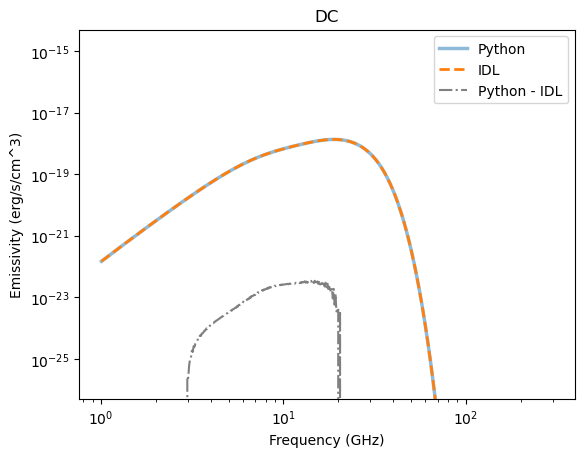

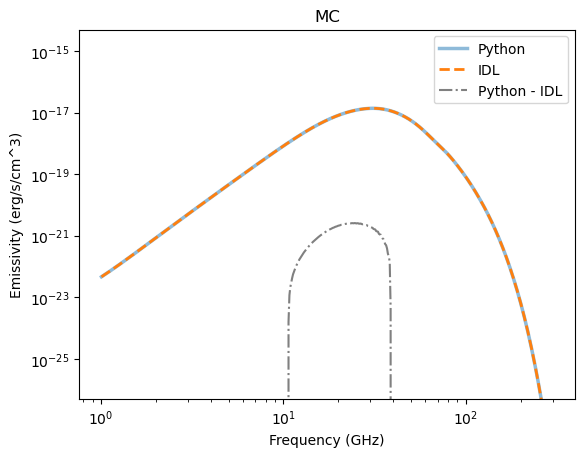

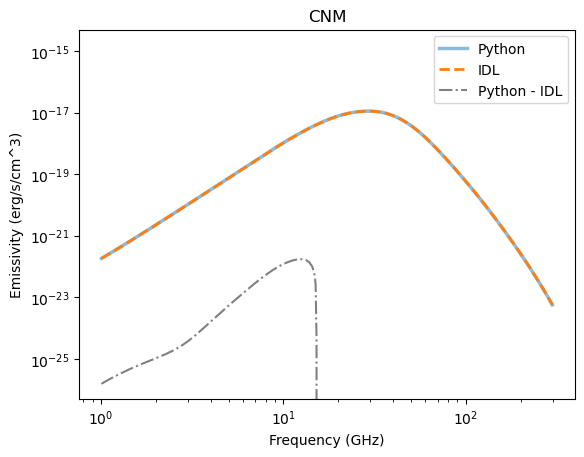

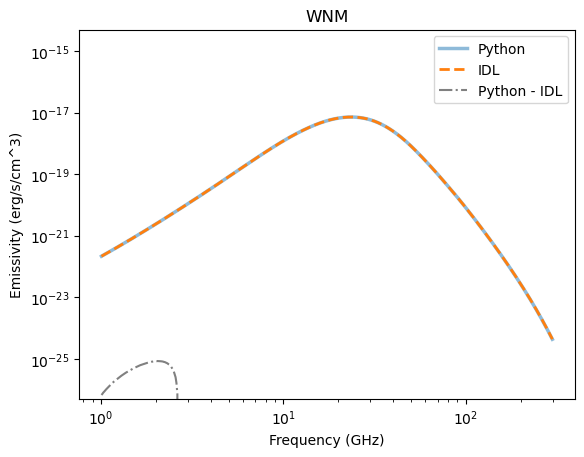

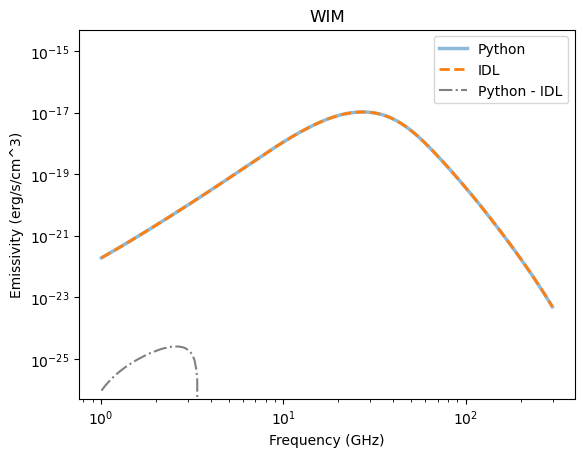

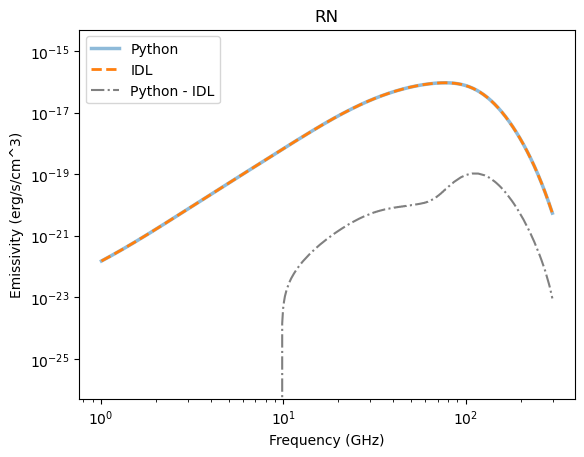

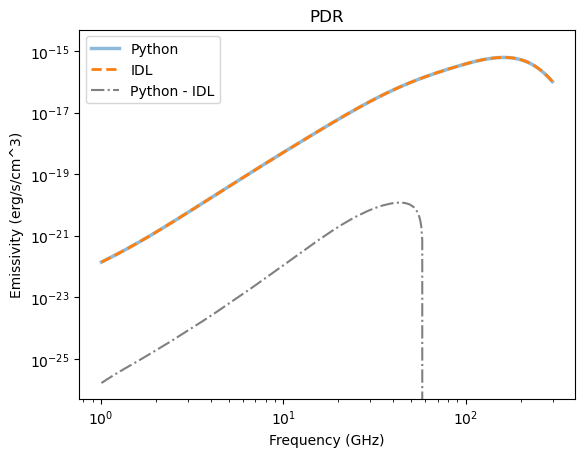

In [15]:
import matplotlib.pyplot as plt

for i in range(7):
    plt.figure()
    plt.plot(python_results[i][0,:], python_results[i][1,:],  lw=2.5, alpha=0.5, label='Python')
    plt.plot(idl_results[i][:,0], idl_results[i][:,1], label='IDL', lw=2, linestyle='--')
    plt.plot(python_results[i][0,:], python_results[i][1,:]-idl_results[i][:,1], label='Python - IDL', linestyle='-.', color='gray')
    plt.legend()
    plt.title(ISM_list[i])
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Emissivity (erg/s/cm^3)')
    plt.ylim(5e-27, 5e-15)
    plt.yscale('log')
    plt.xscale('log')
    plt.show()    